## Preprocessing

In [4]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tensorflow
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
cols_to_drop = ["EIN", "NAME"]
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [9]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
 # Determine the number of unique values in each column.
#cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       #'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL']
df.nunique()
#for col in cols:
  #print(col)
  #print(df[col].nunique())
  #print(df[col].value_counts())
  #print()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [10]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
APPLICATION_TYPE_df = df["APPLICATION_TYPE"].value_counts()
APPLICATION_TYPE_df

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [11]:
app_type_counts = df["APPLICATION_TYPE"].value_counts()
app_type_counts.loc[app_type_counts < 500].index.tolist()

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [12]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

threshold = 500
#app_type_counts = df["APPLICATION_TYPE"].value_counts()
application_types_to_replace = list(APPLICATION_TYPE_df[APPLICATION_TYPE_df< threshold].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [13]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
CLASSIFICATION_df = df['CLASSIFICATION'].value_counts()
CLASSIFICATION_df
#df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [14]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE



class_counts = df["CLASSIFICATION"].value_counts()
class_counts.loc[class_counts > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [15]:
class_counts = df["CLASSIFICATION"].value_counts()
class_counts.loc[class_counts < 200].index.tolist()

['C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [16]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
threshold = 1000

classifications_to_replace = list(CLASSIFICATION_df[CLASSIFICATION_df <threshold].index)


# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
DUMMIES_df = pd.get_dummies(df)
DUMMIES_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False


In [19]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = DUMMIES_df.drop(columns=["IS_SUCCESSFUL"])
y = DUMMIES_df.IS_SUCCESSFUL
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 43) (8575, 43)


In [20]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train["ASK_AMT"].values.reshape(-1, 1))

# Scale the data (only on ASK_AMT)
X_train_scaled = X_train.copy()
X_train_scaled["ASK_AMT"] = X_scaler.transform(X_train["ASK_AMT"].values.reshape(-1, 1))

X_test_scaled = X_test.copy()
X_test_scaled["ASK_AMT"] = X_scaler.transform(X_test["ASK_AMT"].values.reshape(-1, 1))

## Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)


Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5727 - loss: 0.6838
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7233 - loss: 0.5936
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7241 - loss: 0.5744
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7261 - loss: 0.5679
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7271 - loss: 0.5651
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7258 - loss: 0.5622
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7209 - loss: 0.5653
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7199 - loss: 0.5659
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7316 - loss: 0.5521
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7279 - loss: 0.5571


In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7229 - loss: 0.5628
Loss: 0.5627991557121277, Accuracy: 0.7229154706001282


In [31]:
# Export our model to HDF5 file
nn.save("my_model1.h5")

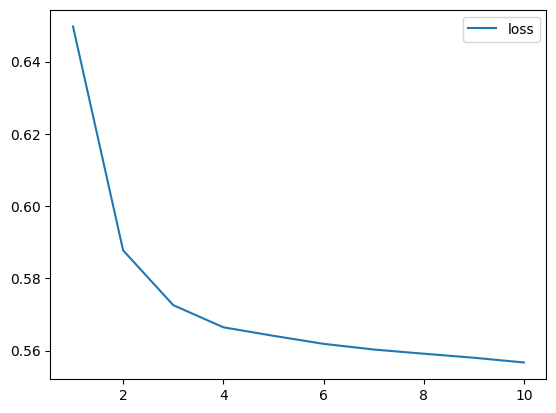

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index plus 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

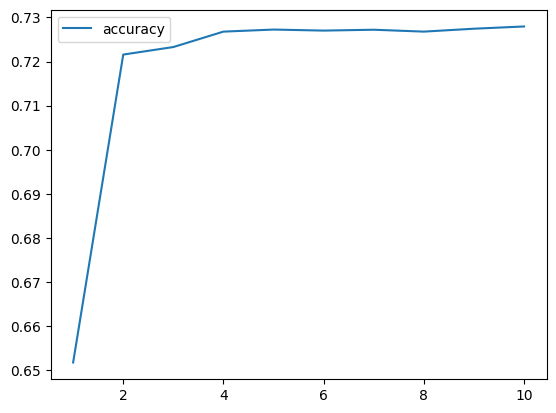

In [33]:
# Create a plot to plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [49]:
def doClassification_NN(nn, X_train_scaled, X_test, y_train, y_test):
    # predict
    train_preds = nn.predict(X_train_scaled.astype('float32')) # Cast X_train_scaled to float32
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn.predict(X_train_scaled.astype('float32')) # Cast X_train_scaled to float32

    test_preds = nn.predict(X_test.astype('float32')) # Cast X_test to float32
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn.predict(X_test.astype('float32')) # Cast X_test to float32


    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[ 8092  3936]
 [ 3044 10652]]

    AUC: 0.7822483003783616

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70     12028
           1       0.73      0.78      0.75     13696

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27      0.50      0.3

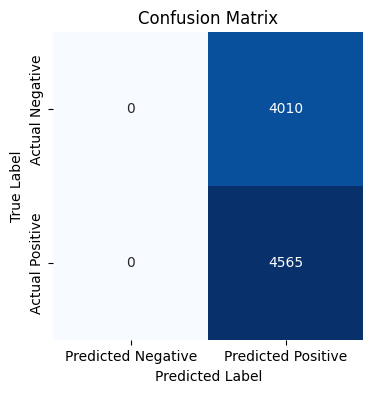

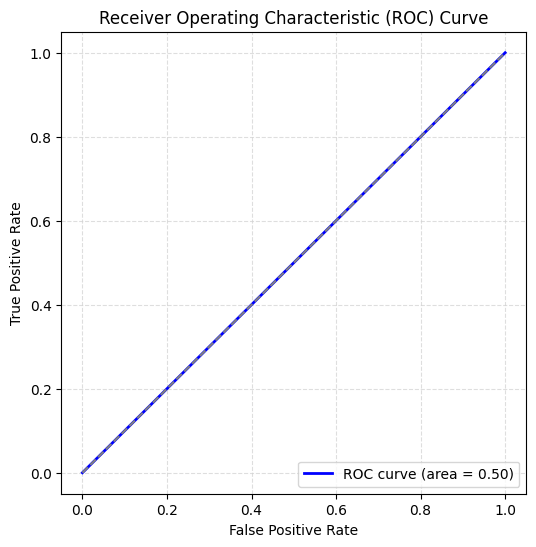

In [50]:
doClassification_NN(nn, X_train_scaled, X_test, y_train, y_test)

In [51]:
# Create the Keras Sequential model
nn_2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_2.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_2.add(tf.keras.layers.Dense(units=5, activation="tanh"))

# Add the output layer that uses a probability activation function
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [54]:
# Train  model
fit_model = nn_2.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6799 - loss: 0.6185
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7254 - loss: 0.5728
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7285 - loss: 0.5639
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7255 - loss: 0.5597
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7260 - loss: 0.5576
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7347 - loss: 0.5502
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7300 - loss: 0.5558
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7275 - loss: 0.5560
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7265 - loss: 0.5554
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7318 - loss: 0.5501


In [56]:
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7237 - loss: 0.5594
Loss: 0.5593591928482056, Accuracy: 0.7237317562103271


In [59]:
# Create a DataFrame containing training history
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

#not sure why i did not have an output on this cell


268/268 - 0s - 1ms/step - accuracy: 0.7237 - loss: 0.5594
Loss: 0.5593591928482056, Accuracy: 0.7237317562103271


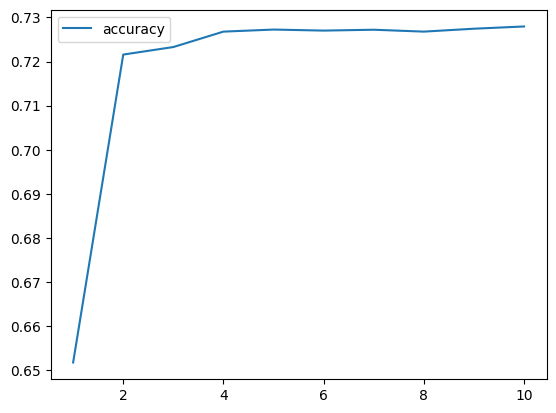

In [60]:
history_df.plot(y="accuracy")
plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[ 8245  3783]
 [ 3163 10533]]

    AUC: 0.7873277978816562

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.69      0.70     12028
           1       0.74      0.77      0.75     13696

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    
TEST METRICS
    Confusion Matrix:
    [[4010    0]
 [4565    0]]

    AUC: 0.49946751412815166

    Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64      4010
           1       0.00      0.00      0.00      4565

    accuracy                           0.47      8575
   macro avg       0.23   

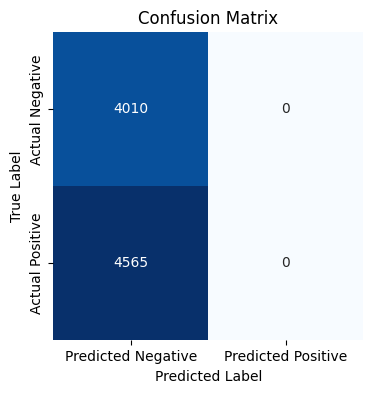

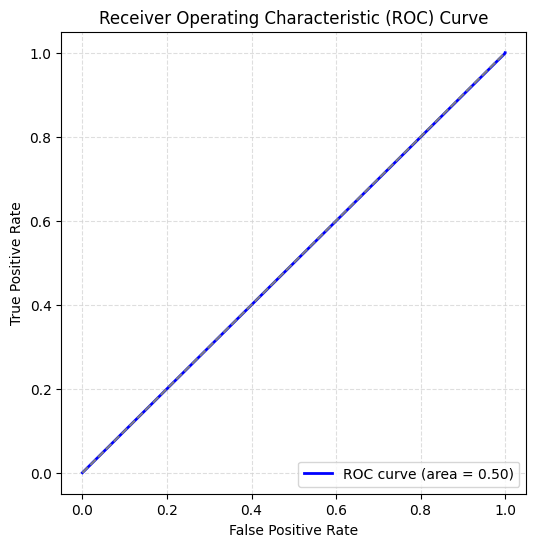

In [61]:
doClassification_NN(nn_2, X_train_scaled, X_test, y_train, y_test)

In [63]:
def doClassification(model, X_train_scaled, X_test, y_train, y_test):

    model.fit(X_train_scaled, y_train)

    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train_scaled)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]


    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)


    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)


    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)


    plt.figure(figsize=(6, 6))

   # Roc curve plot
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')


    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")


    plt.show()

TRAIN METRICS
    Confusion Matrix:
    [[ 8160  3868]
 [ 3218 10478]]

    AUC: 0.7639470160794984

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.70     12028
           1       0.73      0.77      0.75     13696

    accuracy                           0.72     25724
   macro avg       0.72      0.72      0.72     25724
weighted avg       0.72      0.72      0.72     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.6654991218558205

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27      0.50      0.35      8575
weighted avg       0.28      0.53      0.37      8575

    


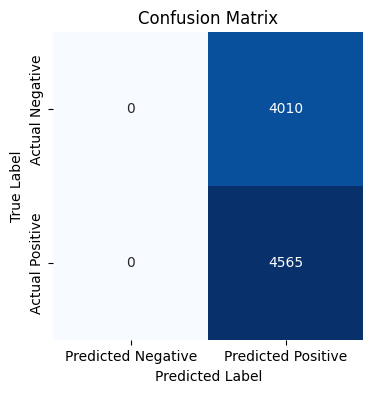

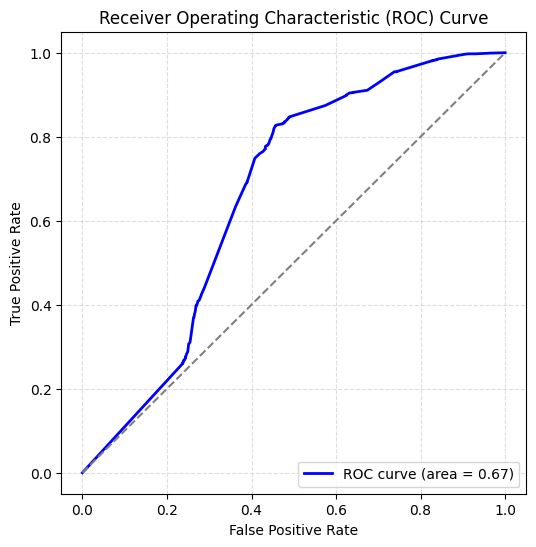

In [64]:

lr = LogisticRegression()

# I present to you my  Machine Learning
doClassification(lr, X_train_scaled, X_test, y_train, y_test)

In [65]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix:
    [[ 8516  3512]
 [ 2784 10912]]

    AUC: 0.8229774327678564

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.71      0.73     12028
           1       0.76      0.80      0.78     13696

    accuracy                           0.76     25724
   macro avg       0.76      0.75      0.75     25724
weighted avg       0.76      0.76      0.75     25724

    
TEST METRICS
    Confusion Matrix:
    [[2927 1083]
 [3128 1437]]

    AUC: 0.5917977782815689

    Classification Report:
                  precision    recall  f1-score   support

           0       0.48      0.73      0.58      4010
           1       0.57      0.31      0.41      4565

    accuracy                           0.51      8575
   macro avg       0.53      0.52      0.49      8575
weighted avg       0.53      0.51      0.49      8575

    


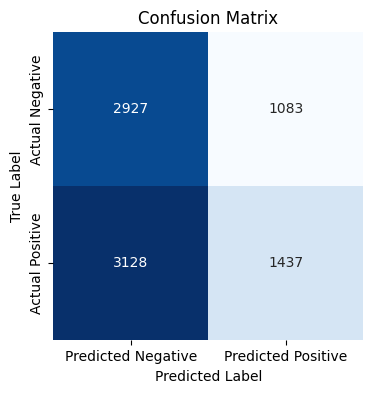

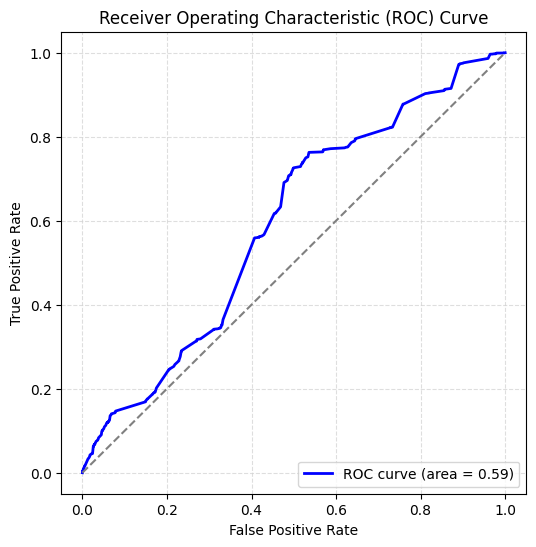

In [66]:
 #
xgb = XGBClassifier(random_state=42)

#  Machine Learning
doClassification(xgb, X_train_scaled, X_test, y_train, y_test)